In [15]:
import cv2
import keras # importar lib keras
#lib para ver muestras del dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import pickle # guardar dataset

In [4]:
# Cargar los datos etiquetados
with open('dataset_frutas_train.pickle', 'rb') as handle:
    X, y = pickle.load(handle)

In [5]:
# Asegúrate de que X y y están cargados correctamente
print(f"X shape: {np.array(X).shape}") # Debe mostrar algo como (n, 500, 500, 3) si son imágenes a color
print(f"y shape: {np.array(y).shape}")

X shape: (2300, 100, 100, 3)
y shape: (2300,)


Primeras 5 imágenes de la clase 0:


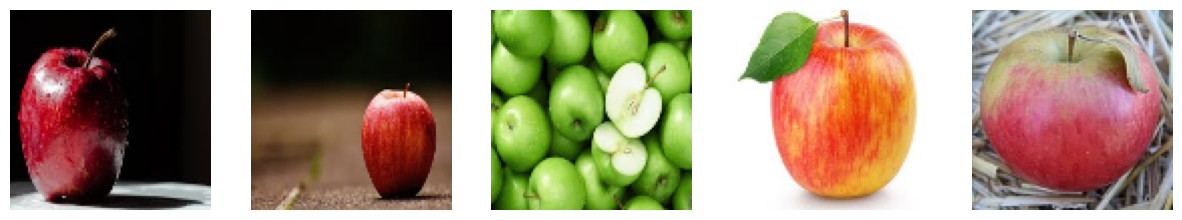

Primeras 5 imágenes de la clase 1:


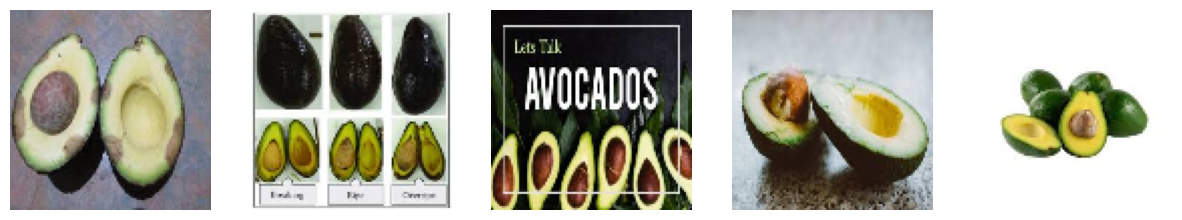

Primeras 5 imágenes de la clase 2:


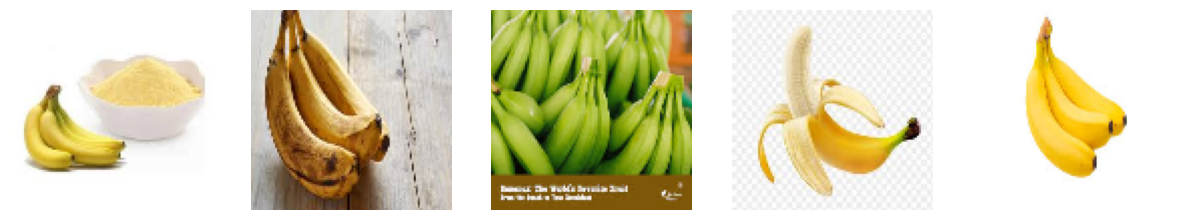

In [7]:
# Convertir de BGR a RGB para la visualización
X_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in X]

def visualizar_primeras_imagenes_por_etiqueta(X, y, etiqueta, n=5):
    indices = np.where(y == etiqueta)[0][:n]
    fig, axs = plt.subplots(1, n, figsize=(15, 3))
    for i, idx in enumerate(indices):
        axs[i].imshow(X[idx], cmap='gray')
        axs[i].axis('off')
    plt.show()

# Visualiza las primeras 5 imágenes de cada etiqueta
# Asumiendo que 0 es para una clase (ej., gatos) y 1 es para la otra (ej., perros)
print("Primeras 5 imágenes de la clase 0:")
visualizar_primeras_imagenes_por_etiqueta(X_rgb, y, 0)

print("Primeras 5 imágenes de la clase 1:")
visualizar_primeras_imagenes_por_etiqueta(X_rgb, y, 1)

print("Primeras 5 imágenes de la clase 2:")
visualizar_primeras_imagenes_por_etiqueta(X_rgb, y, 2)

In [13]:
y.shape

(2300,)

In [8]:
# Normalizar los datos de las imágenes
X = X.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_ohe = to_categorical(y, 10)

In [16]:
X[2].shape

(100, 100, 3)

In [14]:
y_ohe.shape

(2300, 10)

In [17]:
# Definir arquitectura de la red VGG
model_vgg = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')
])

d:\IA integrador 2024\Datos_frutas\venv_frutas\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model_vgg.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_vgg.fit(X,y_ohe, epochs=20, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])